In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.utils import to_categorical

import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os   
import os.path
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

import dlib
import time
 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

Using TensorFlow backend.


In [2]:
X=[]
Y=[]

Aishee='HOG2/Aishee'
Arkaprabha='HOG2/Arkaprabha'
Rohit='HOG2/Rohit'
Parnavi='HOG2/Parnavi'
Akanksha='HOG2/Akanksha'
Sayan='HOG2/Sayan'
Sukrita='HOG2/Sukrita'
Ritodeep='HOG2/Ritodeep'

In [3]:
def assign_label(img,student_name):
    return student_name

def make_train_data(student_name,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,student_name)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,0)
        img = cv2.resize(img, (150,150))
        X.append(np.array(img))
        Y.append(str(label))

In [4]:
make_train_data('Aishee',Aishee)

make_train_data('Arkaprabha',Arkaprabha)

make_train_data('Rohit',Rohit)

make_train_data('Parnavi',Parnavi)

make_train_data('Akanksha',Akanksha)

make_train_data('Sayan',Sayan)

make_train_data('Sukrita',Sukrita)

make_train_data('Ritodeep',Ritodeep)

100%|██████████| 87/87 [00:05<00:00, 15.40it/s]


In [5]:
names = ["Aishee","Akanksha","Arkaprabha","Parnavi","Rohit","Ritodeep","Sayan","Sukrita"]

In [6]:
le=LabelEncoder()
Y1=le.fit_transform(Y)
Y1=to_categorical(Y1,8)
Y2 = np.array([np.argmax(y) for y in Y1])
# print(Y2)
X=np.array(X)
X=X/255
# X=X[:,:,:,np.newaxis]

x_train,x_test,y_train,y_test = train_test_split(X,Y2,test_size=0.2,random_state=42)

In [7]:
# print(le.inverse_transform(Y2))
# print(Y2)

In [8]:
#create our LBPH face recognizer 
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

#or use EigenFaceRecognizer by replacing above line with 
# face_recognizer = cv2.face.EigenFaceRecognizer_create()

#or use FisherFaceRecognizer by replacing above line with 
# face_recognizer = cv2.face.FisherFaceRecognizer_create()

In [9]:
#train our face recognizer of our training faces
face_recognizer.train(x_train, np.array(y_train))

In [10]:
# #function to draw rectangle on image 
# #according to given (x, y) coordinates and 
# #given width and heigh
# def draw_rectangle(img, rect):
#     (x, y, w, h) = rect
#     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
# #function to draw text on give image starting from
# #passed (x, y) coordinates. 
# def draw_text(img, text, x, y):
#     cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [11]:
# #this function recognizes the person in image passed
# #and draws a rectangle around detected face with name of the 
# #subject
# def predict(test_img):
# #make a copy of the image as we don't want to change original image
# img = test_img.copy()
# #detect face from the image
# face, rect = detect_face(img)

# #predict the image using our face recognizer 
# label = face_recognizer.predict(face)
# #get name of respective label returned by face recognizer
# label_text = subjects[label]
 
# #draw a rectangle around face detected
# draw_rectangle(img, rect)
# #draw name of predicted person
# draw_text(img, label_text, rect[0], rect[1]-5)
 
# return img

In [12]:
print("Predicting images...")

#perform a prediction
pred = []
for i in range(len(x_test)):
    pred.append(face_recognizer.predict(x_test[i]))
print("Prediction complete")

#display both images
# cv2.imshow(subjects[1], predicted_img1)
# cv2.imshow(subjects[2], predicted_img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


c = 0 
for i in range(0,len(pred)):
    if y_test[i] == pred[i][0]:
        c += 1
        
acc = c/len(pred)

print(acc)

Predicting images...
Prediction complete
0.8866666666666667


In [13]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
#     if(np.argmax(y_test[i])==pred_digits[i]):
    if y_test[i] == pred[i][0]:
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
#     if(not np.argmax(y_test[i])==pred_digits[i]):
    if not y_test[i] == pred[i][0]:
        mis_class.append(i)
    if(len(mis_class)==8):
        break

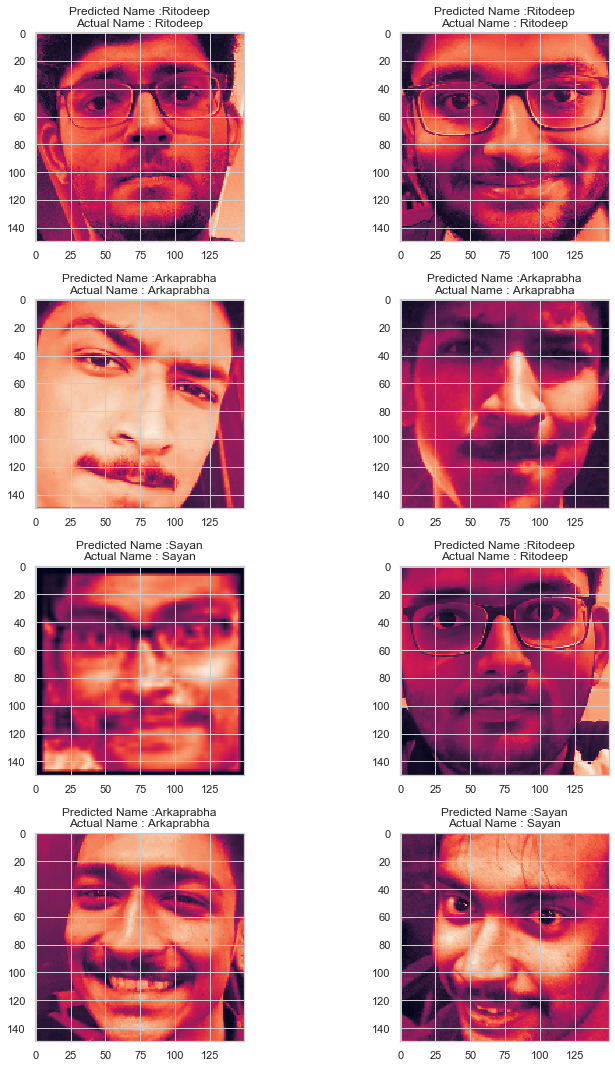

In [14]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Name :"+str(names[pred[prop_class[count]][0]])+"\n"+"Actual Name : "+str(names[y_test[prop_class[count]]]))
        plt.tight_layout()
        count+=1

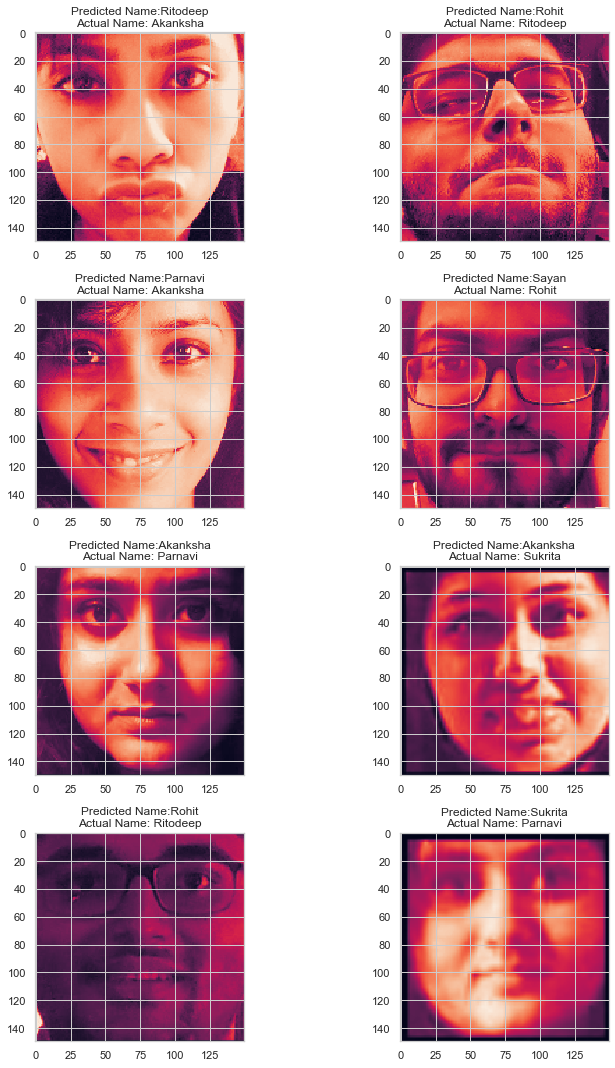

In [15]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Name:"+str(names[pred[mis_class[count]][0]])+"\n"+"Actual Name: "+str(names[y_test[mis_class[count]]]))
        plt.tight_layout()
        count+=1

In [16]:
mc = []
i=0
for i in range(len(y_test)):
#     if(not np.argmax(y_test[i])==pred_digits[i]):
    if not y_test[i] == pred[i][0]:
        mc.append(i)

print(mc)

[4, 10, 13, 24, 25, 27, 29, 30, 40, 52, 88, 100, 102, 106, 109, 123, 126]


In [17]:
pred

[(5, 67.6065962891783),
 (5, 46.99918432311642),
 (2, 78.32367714766565),
 (2, 70.15961591978486),
 (5, 77.70701257148727),
 (6, 60.676096503058396),
 (5, 64.2170851531546),
 (2, 55.65629544240335),
 (6, 48.4736154696347),
 (3, 59.697210766549894),
 (4, 69.46412238969725),
 (3, 41.31972321469098),
 (1, 46.70402745953838),
 (3, 71.06699284565639),
 (3, 51.34802691299214),
 (0, 43.23361896894372),
 (7, 40.16602148973693),
 (1, 39.535545724908395),
 (2, 39.94903756869748),
 (4, 69.31054633395745),
 (0, 41.50925498796076),
 (7, 36.94932104979566),
 (1, 62.12658565324746),
 (4, 65.78838134325194),
 (6, 70.39833414180983),
 (1, 68.41031621001156),
 (5, 66.94207963574955),
 (1, 82.3054287573043),
 (7, 38.05279702000278),
 (4, 66.67476495017627),
 (7, 83.74126295183235),
 (1, 39.93466210206453),
 (3, 55.9358225549567),
 (6, 66.62625938949941),
 (0, 44.24166849071549),
 (0, 48.38439175954117),
 (6, 41.084621332937296),
 (3, 72.60799996909587),
 (3, 64.63164171957303),
 (1, 39.44685483378035),
 

In [18]:
y_test

array([5, 5, 2, 2, 1, 6, 5, 2, 6, 3, 5, 3, 1, 1, 3, 0, 7, 1, 2, 4, 0, 7,
       1, 4, 4, 3, 5, 7, 7, 5, 3, 1, 3, 6, 0, 0, 6, 3, 3, 1, 0, 1, 7, 0,
       6, 0, 1, 3, 0, 6, 6, 3, 1, 2, 5, 5, 2, 0, 2, 7, 4, 5, 5, 7, 1, 0,
       1, 3, 1, 7, 4, 4, 5, 3, 6, 0, 5, 4, 1, 0, 7, 3, 0, 3, 2, 4, 7, 3,
       6, 0, 5, 4, 7, 2, 5, 6, 2, 0, 5, 0, 7, 2, 0, 7, 4, 1, 3, 2, 4, 7,
       1, 7, 3, 6, 1, 3, 0, 4, 0, 5, 6, 5, 3, 0, 3, 6, 7, 1, 5, 0, 4, 7,
       6, 1, 5, 3, 0, 4, 1, 1, 4, 7, 1, 2, 4, 6, 0, 6, 2, 0], dtype=int64)